In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

import os
from share.helper_functions import(
    download_if_not_modified_today
)
from share.rogalski_functions import(
    data_voi_df
)
import pandas as pd
from sorcery import dict_of
from share.helper_functions import (
    plot
)
import datetime

In [2]:
data_dir = './Rogalski_data'
data_file = 'wojewodztwa.csv'
path = os.sep.join([data_dir,data_file])
download_command='./get_voi.sh'

download_if_not_modified_today(path, download_command)
df = pd.read_csv(path)

./Rogalski_data/wojewodztwa.csv exists
./Rogalski_data/wojewodztwa.csv was modified today, not downloading


In [3]:


dfc = data_voi_df(df, 'cases')
dfc

Województwo,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,...,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10
Dolnośląskie,0,0,1,0,1,1,1,0,3,1,...,2159,2345,2396,2070,2248,1408,1727,2500,2578,2261
Kujawsko-Pomorskie,0,0,0,0,0,0,0,0,0,0,...,1361,1726,1318,1490,1128,526,1293,1407,1530,1393
Lubelskie,0,0,0,0,0,0,1,1,4,1,...,1264,925,1022,1033,505,285,802,900,762,668
Lubuskie,1,0,0,0,0,0,0,0,0,0,...,656,747,874,660,641,536,552,722,964,825
Łódzkie,0,0,0,0,0,0,0,1,1,3,...,1682,1666,1461,1417,1240,722,1371,1679,1628,1347
Małopolskie,0,0,0,0,0,1,0,0,0,0,...,2570,2327,2236,2255,1910,1290,1444,2505,2426,2352
Mazowieckie,0,0,0,0,2,0,1,1,2,5,...,4806,4048,3731,4270,3469,2116,2790,4035,3969,3530
Opolskie,0,0,0,0,0,0,0,1,1,0,...,694,962,947,833,873,502,484,827,1004,870
Podkarpackie,0,0,0,0,0,0,0,1,2,3,...,1080,1060,1050,907,742,365,789,900,950,833
Podlaskie,0,0,0,0,0,0,0,0,0,0,...,672,567,563,469,308,148,307,539,400,422


In [4]:
dfd = data_voi_df(df, 'deaths')
dfd

Województwo,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,...,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10
Dolnośląskie,0,0,0,0,0,0,0,0,0,1,...,32,11,30,18,1,0,29,33,28,21
Kujawsko-Pomorskie,0,0,0,0,0,0,0,0,0,0,...,15,20,22,36,5,6,43,36,39,20
Lubelskie,0,0,0,0,0,0,0,0,0,0,...,66,59,38,42,0,0,42,45,34,37
Lubuskie,0,0,0,0,0,0,0,0,0,0,...,12,14,9,14,2,2,12,6,12,18
Łódzkie,0,0,0,0,0,0,0,0,0,0,...,46,39,25,23,0,0,25,62,33,29
Małopolskie,0,0,0,0,0,0,0,0,0,0,...,49,50,40,51,0,7,39,30,80,45
Mazowieckie,0,0,0,0,0,0,0,0,0,0,...,76,69,52,58,29,1,62,78,80,86
Opolskie,0,0,0,0,0,0,0,0,0,0,...,29,16,20,22,0,0,22,32,23,10
Podkarpackie,0,0,0,0,0,0,0,0,0,0,...,38,20,43,56,2,0,30,23,33,63
Podlaskie,0,0,0,0,0,0,0,0,0,0,...,27,33,22,24,0,0,18,43,29,30


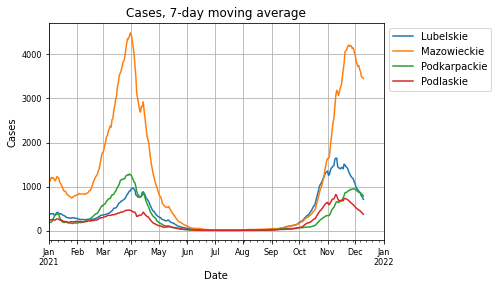

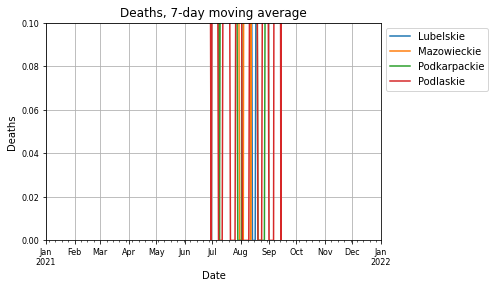

In [10]:
dfq=dfc.T[['Lubelskie', 'Mazowieckie', 'Podkarpackie', 'Podlaskie']].rolling(7).mean()
dfp=dfd.T[['Lubelskie', 'Mazowieckie', 'Podkarpackie', 'Podlaskie']].rolling(7).mean()
# display(dfq)

plotopts = dict_of(
    plotdf=dfq,
    xlabel = 'Date',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,1,1), datetime.date(2022,1,1))
    )

plot(**plotopts);

plotopts = dict_of(
    plotdf=dfp,
    xlabel = 'Date',
    ylabel = 'Deaths',
    title = f'Deaths, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,1,1), datetime.date(2022,1,1)),
    )

plot(**plotopts);